# 데이터 스크래핑
데이터 스크래핑은 웹 사이트나 온라인 소스에서 원하는 데이터를 자동으로 추출하는 기술을 의미합니다. 이 과정을 통해 사람이 일일이 데이터를 수집하지 않고도, 프로그램을 이용하여 대량의 정보를 빠르게 모을 수 있습니다.

## robots.txt 파일
웹사이트의 루트 디렉토리에 위치한 텍스트 파일로, 웹 크롤러(검색 엔진 로봇)나 스크래퍼에게 어떤 페이지나 디렉토리를 크롤링해도 되는지, 또는 크롤링하지 말아야 하는지 지시하는 역할을 합니다.

* User-agent: 각 지시문이 적용되는 크롤러를 지정합니다.
* Disallow: 해당 경로에 있는 페이지나 디렉토리에 접근하지 말라는 지시입니다.
* Allow: Disallow 규칙이 적용되는 범위 중에서 특정 경로는 접근을 허용하는 경우 사용합니다.

## GET 요청
GET은 서버에서 데이터를 “요청”할 때 사용하는 메서드입니다. URL에 필요한 정보(쿼리 파라미터)를 포함하여 보내며, 주로 데이터를 조회할 때 사용됩니다.

* HTML 소스 가져오기

In [2]:
import requests

# 대상 사이트 URL
url = "http://example.com"

# GET 요청을 보내 HTML 소스 가져오기
response = requests.get(url)

# 응답 상태 코드 확인 (200이면 성공)
print("상태 코드:", response.status_code)

상태 코드: 200


* HTML 소스 출력하기

In [3]:
# HTML 소스 출력 (문자열 형태)
html_content = response.text
print("HTML 소스:\n", html_content)

HTML 소스:
 <!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>

* 간단한 데이터 추출 (예: 제목 추출)

In [4]:
from bs4 import BeautifulSoup

# BeautifulSoup 객체 생성 (HTML 파싱)
soup = BeautifulSoup(html_content, 'html.parser')

# <title> 태그의 내용 추출
page_title = soup.title.string
print("페이지 제목:", page_title)

# <h1> 태그의 내용 추출
h1_text = soup.find('h1').string
print("헤더 텍스트:", h1_text)

# 첫 번째 <p> 태그의 내용 추출
p_text = soup.find('p').string
print("본문 내용:", p_text)

페이지 제목: Example Domain
헤더 텍스트: Example Domain
본문 내용: This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.


## 연습문제
1. 로또 데이터를 모두 수집한 후, 번호별 출현횟수를 구하고 이를 시각화하세요.

In [5]:
import requests 
url = requests.get("https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&q=%EB%A1%9C%EB%98%90")

In [7]:
from bs4 import BeautifulSoup  

html = BeautifulSoup(url.text)

In [9]:
def make_numbers(html):
    box = html.find("div", class_ = "lottonum").find_all("span")
    del box[6:8]

    numbers = []
    for i in box:
        numbers.append(int(i.text)) 
    return numbers

In [14]:
import requests
import time 

total = []
for i in range(1,1161):                                             # 999회차 가져왓을때 V 여기가 999니까 이부분을 i로 바꿔서 모든회차에 대해서 가져올 수 있도록 
    url = requests.get(f"https://search.daum.net/search?w=tot&rtmaxcoll=LOT&DA=LOT&q={i}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8")
    html = BeautifulSoup(url.text)
    numbers = make_numbers(html)
    total.append(numbers)
    print(f"{i}회 로또 데이터 저장 완료 : {numbers}")
    time.sleep(1)

1회 로또 데이터 저장 완료 : [10, 23, 29, 33, 37, 40, 16]
2회 로또 데이터 저장 완료 : [9, 13, 21, 25, 32, 42, 2]
3회 로또 데이터 저장 완료 : [11, 16, 19, 21, 27, 31, 30]
4회 로또 데이터 저장 완료 : [14, 27, 30, 31, 40, 42, 2]
5회 로또 데이터 저장 완료 : [16, 24, 29, 40, 41, 42, 3]
6회 로또 데이터 저장 완료 : [14, 15, 26, 27, 40, 42, 34]
7회 로또 데이터 저장 완료 : [2, 9, 16, 25, 26, 40, 42]
8회 로또 데이터 저장 완료 : [8, 19, 25, 34, 37, 39, 9]
9회 로또 데이터 저장 완료 : [2, 4, 16, 17, 36, 39, 14]
10회 로또 데이터 저장 완료 : [9, 25, 30, 33, 41, 44, 6]
11회 로또 데이터 저장 완료 : [1, 7, 36, 37, 41, 42, 14]
12회 로또 데이터 저장 완료 : [2, 11, 21, 25, 39, 45, 44]
13회 로또 데이터 저장 완료 : [22, 23, 25, 37, 38, 42, 26]
14회 로또 데이터 저장 완료 : [2, 6, 12, 31, 33, 40, 15]
15회 로또 데이터 저장 완료 : [3, 4, 16, 30, 31, 37, 13]
16회 로또 데이터 저장 완료 : [6, 7, 24, 37, 38, 40, 33]
17회 로또 데이터 저장 완료 : [3, 4, 9, 17, 32, 37, 1]
18회 로또 데이터 저장 완료 : [3, 12, 13, 19, 32, 35, 29]
19회 로또 데이터 저장 완료 : [6, 30, 38, 39, 40, 43, 26]
20회 로또 데이터 저장 완료 : [10, 14, 18, 20, 23, 30, 41]
21회 로또 데이터 저장 완료 : [6, 12, 17, 18, 31, 32, 21]
22회 로또 데이터 저장 완료 : [4, 5, 6, 

In [21]:
cnt = [0] * 45
for i in range(0,1160):
    for j in range(0,7):
        for k in range(1,46):
            if total[i][j] == k:
                cnt[k-1] += 1
for i in range(1,46):
    print(f"{i}의 출현횟수: {cnt[i-1]}번")

1의 출현횟수: 191번
2의 출현횟수: 179번
3의 출현횟수: 188번
4의 출현횟수: 187번
5의 출현횟수: 170번
6의 출현횟수: 187번
7의 출현횟수: 189번
8의 출현횟수: 171번
9의 출현횟수: 149번
10의 출현횟수: 182번
11의 출현횟수: 182번
12의 출현횟수: 196번
13의 출현횟수: 195번
14의 출현횟수: 186번
15의 출현횟수: 181번
16의 출현횟수: 182번
17의 출현횟수: 191번
18의 출현횟수: 186번
19의 출현횟수: 181번
20의 출현횟수: 188번
21의 출현횟수: 181번
22의 출현횟수: 154번
23의 출현횟수: 156번
24의 출현횟수: 183번
25의 출현횟수: 161번
26의 출현횟수: 188번
27의 출현횟수: 196번
28의 출현횟수: 167번
29의 출현횟수: 159번
30의 출현횟수: 179번
31의 출현횟수: 184번
32의 출현횟수: 171번
33의 출현횟수: 195번
34의 출현횟수: 201번
35의 출현횟수: 182번
36의 출현횟수: 179번
37의 출현횟수: 186번
38의 출현횟수: 188번
39의 출현횟수: 181번
40의 출현횟수: 185번
41의 출현횟수: 158번
42의 출현횟수: 168번
43의 출현횟수: 193번
44의 출현횟수: 179번
45의 출현횟수: 185번


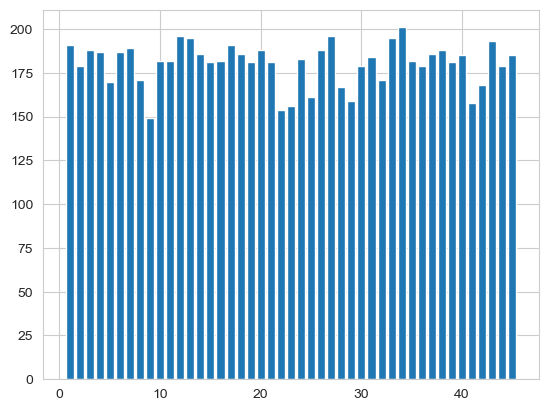

In [42]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

numbers = np.arange(1, 46)

plt.bar(numbers, cnt)
plt.show()

2. 최근 데이터를 기준으로, 번호별로 몇 주 동안 출현하지 않았는지 분석한 후, 제공된 Result.txt 파일과 동일한 형식의 파일을 생성하는 코드를 작성하세요.

In [48]:
latest_appearance = {i: -1 for i in range(1, 46)}

for j in range(1159, -1, -1):
    for num in total[j]:
        if latest_appearance[num] == -1:
            latest_appearance[num] = j

latest_round = max(latest_appearance.values())
non_appearance_weeks = {num: latest_round - last_round for num, last_round in latest_appearance.items()}

print(f"{latest_round + 1}회 기준 로또 번호별 연속 미출현 기간")
for num, weeks in sorted(non_appearance_weeks.items(), key=lambda x: -x[1]):
    print(f"{num}번: {weeks}주 연속 미출현")

with open("Result.txt", "w", encoding="utf-8") as f:
    f.write(f"{latest_round + 1}회 기준 로또 번호별 연속 미출현 기간\n\n")
    for num, weeks in sorted(non_appearance_weeks.items(), key=lambda x: -x[1]):
        f.write(f"{num}번: {weeks}주 연속 미출현\n")

1160회 기준 로또 번호별 연속 미출현 기간
23번: 26주 연속 미출현
42번: 24주 연속 미출현
14번: 22주 연속 미출현
33번: 15주 연속 미출현
17번: 14주 연속 미출현
40번: 14주 연속 미출현
43번: 14주 연속 미출현
11번: 13주 연속 미출현
24번: 13주 연속 미출현
6번: 12주 연속 미출현
2번: 9주 연속 미출현
15번: 9주 연속 미출현
29번: 9주 연속 미출현
1번: 7주 연속 미출현
35번: 7주 연속 미출현
44번: 7주 연속 미출현
4번: 6주 연속 미출현
8번: 6주 연속 미출현
22번: 6주 연속 미출현
10번: 5주 연속 미출현
16번: 5주 연속 미출현
30번: 4주 연속 미출현
31번: 4주 연속 미출현
34번: 4주 연속 미출현
41번: 4주 연속 미출현
5번: 3주 연속 미출현
12번: 3주 연속 미출현
26번: 3주 연속 미출현
20번: 2주 연속 미출현
21번: 2주 연속 미출현
25번: 2주 연속 미출현
32번: 2주 연속 미출현
37번: 2주 연속 미출현
3번: 1주 연속 미출현
9번: 1주 연속 미출현
27번: 1주 연속 미출현
28번: 1주 연속 미출현
38번: 1주 연속 미출현
7번: 0주 연속 미출현
13번: 0주 연속 미출현
18번: 0주 연속 미출현
19번: 0주 연속 미출현
36번: 0주 연속 미출현
39번: 0주 연속 미출현
45번: 0주 연속 미출현


3. 로또에서 6개의 번호 중 3개의 번호를 맞추면 5등에 당첨됩니다. 지금까지 한 번도 등장하지 않은 5등 번호 조합을 찾아, 그 개수를 출력하세요.

In [67]:
import itertools

numbers = lotto[['1번째', '2번째', '3번째', '4번째', '5번째', '6번째']]
appear = []

all = list(itertools.combinations(range(1, 46), 3))

for i in range(len(numbers)):
    combs = list(itertools.combinations(numbers.iloc[i], 3)) 
    appear.extend(combs)

box = []
appear_set = set(appear)

for comb in all:
    if comb not in appear_set:
        box.append(comb)

print(f"한 번도 등장하지 않은 5등 번호 조합의 개수: {len(box)}")

한 번도 등장하지 않은 5등 번호 조합의 개수: 2681
